<a href="https://colab.research.google.com/github/CMOONCS/Outreach_JC_AI4F/blob/main/Introduction_to_Speech_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Record and Plot Your Voice

In [ ]:
#@title  Step 1: Install Libraries
!pip install ffmpeg-python

In [ ]:
#@title  Step 2: Run Code to Record your Voice
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [ ]:
#@title  Step 3: Record Your Voice
audio, sr = get_audio()

In [ ]:
#@title  Step 4: Plot Your Voice
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()


# B. Use AI to Transcribe the Audio File

### **Instruction 1:** Download the audio file on your computer
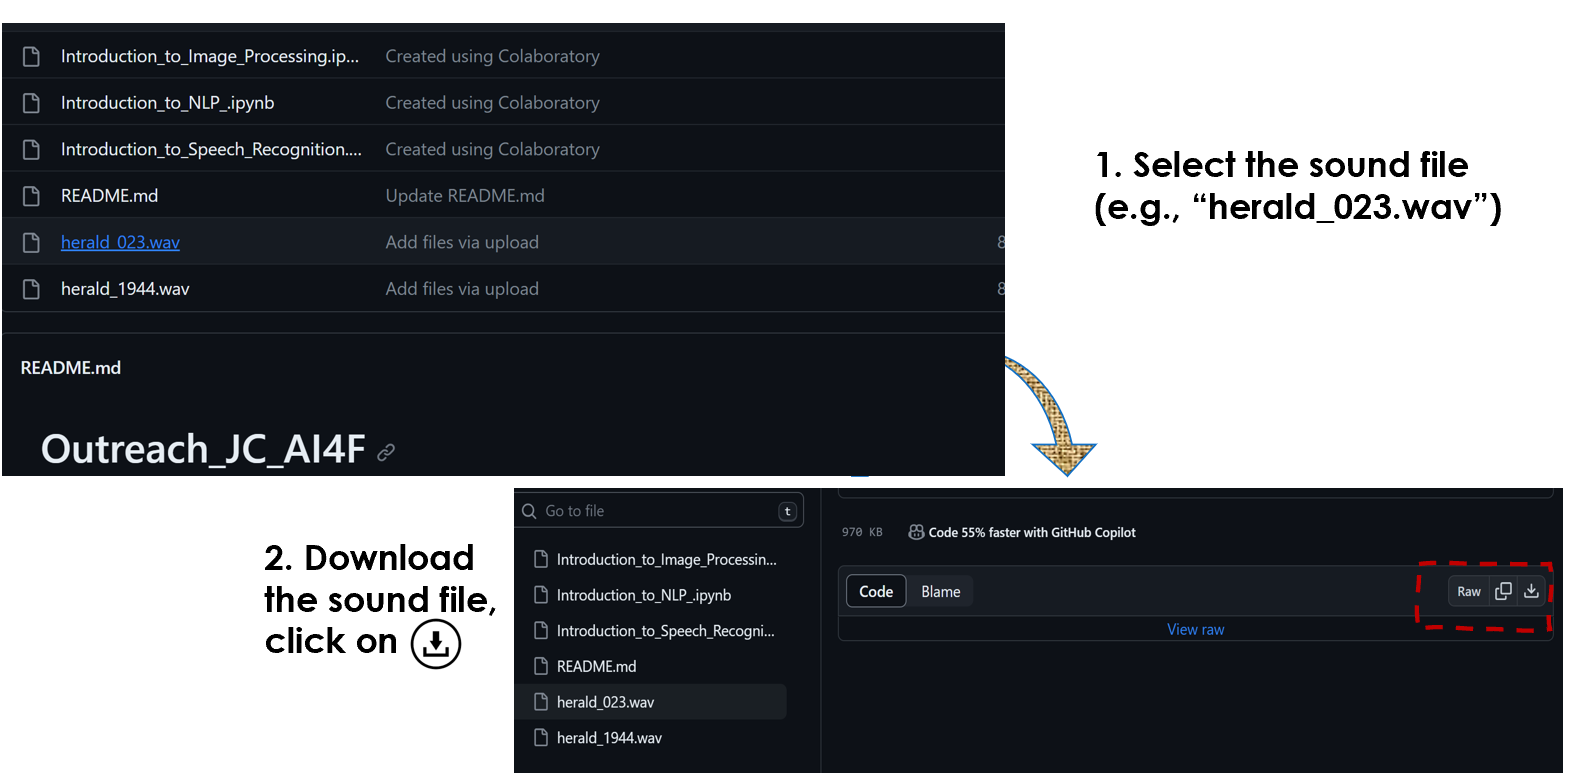

### **Instruction 2:** Upload to use it.
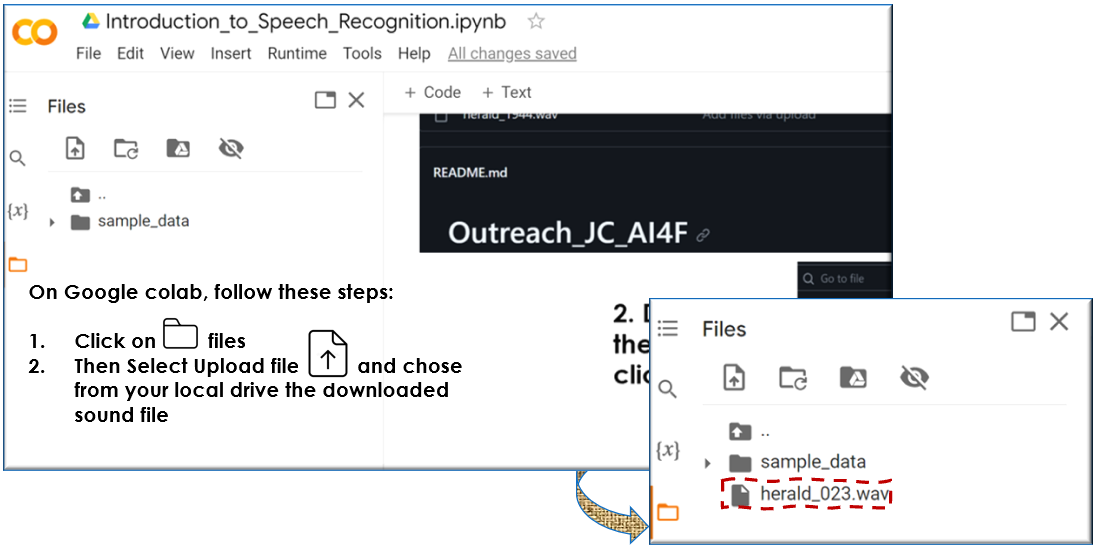

In [ ]:
#@title  Step 5: Install required libraries
!pip install SpeechRecognition

In [ ]:
#@title  Step 6:Import Required Libraries
from IPython.display import Audio
from scipy.io import wavfile
import speech_recognition as sr

In [ ]:
#@title  Step 7: Performing speech recognition
speech_file = "herald_023.wav"
r = sr.Recognizer()
test_wav = sr.AudioFile(speech_file)
with test_wav as source:
    audio = r.record(source)
ASR_result = r.recognize_google(audio)

In [ ]:
#@title  Step 8: Show ASR result
ASR_result

In [ ]:
#@title  Step 9: Play the audio file
sample_rate, _ = wavfile.read(speech_file)
speech_player = Audio(speech_file, rate=sample_rate)
display(speech_player)